In [1]:
# 1.
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cardio = pd.read_csv("../Data/cardio_train.csv", sep=";")
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
# 1.1 EDA
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [3]:
# EDA
cardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


cardio
0    35021
1    34979
Name: count, dtype: int64


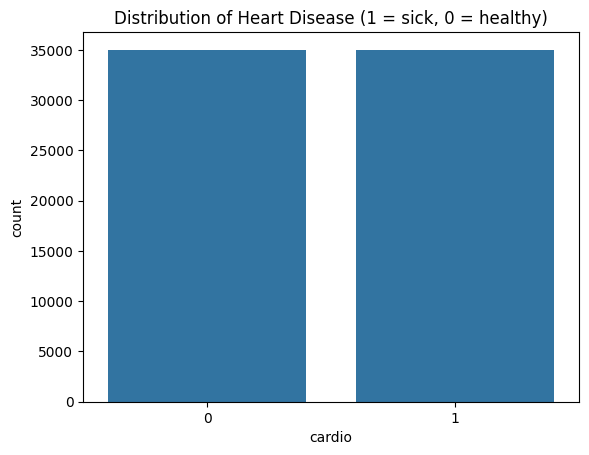

In [4]:
# 1.1 a) Hjärtkärlsjukdom
# 1 = sjuk, 0 = frisk
print(cardio["cardio"].value_counts())

# plot Hjärtkärlsjukdom
sns.countplot(x="cardio", data=cardio)
plt.title("Distribution of Heart Disease (1 = sick, 0 = healthy)")
plt.show()

<Axes: xlabel='cardio', ylabel='count'>

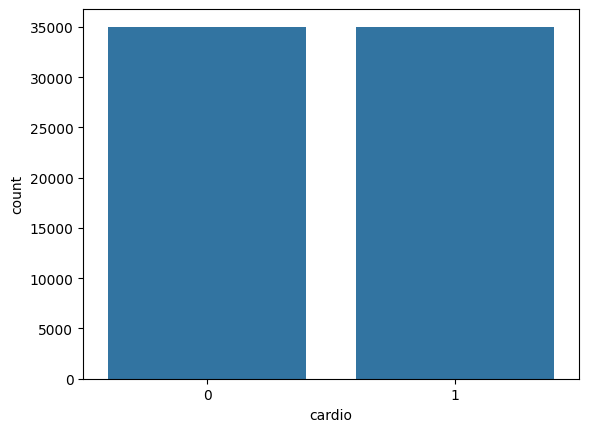

In [5]:
# plot Hjärtkärlsjukdom
sns.countplot(x="cardio", data=cardio)

cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64


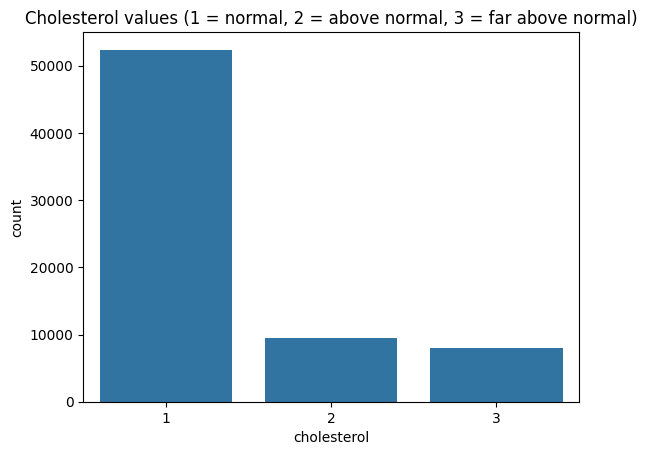

In [5]:
# 1.1 b) Kolestrolvärden
# 1 = normal, 2 = över normal, 3 = långt över normal
print(cardio["cholesterol"].value_counts())

# plot kolesterolvärden
sns.countplot(x="cholesterol", data=cardio)
plt.title("Cholesterol values (1 = normal, 2 = above normal, 3 = far above normal)")
plt.show()

age
54.084932    32
49.961644    32
55.824658    31
50.008219    31
56.005479    31
             ..
52.813699     1
45.186301     1
54.956164     1
64.819178     1
49.112329     1
Name: count, Length: 8076, dtype: int64


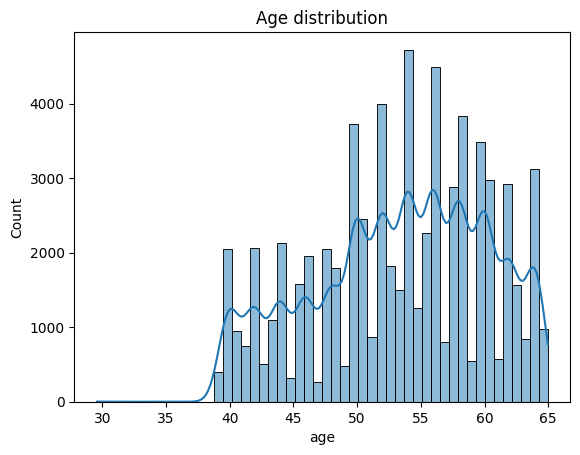

In [6]:
# 1.1 c) Åldersfördelning
cardio["age"] = cardio["age"] / 365
print(cardio["age"].value_counts())
sns.histplot(cardio["age"], bins=50, kde=True)
plt.title("Age distribution")
plt.show()


smoke
0    63831
1     6169
Name: count, dtype: int64


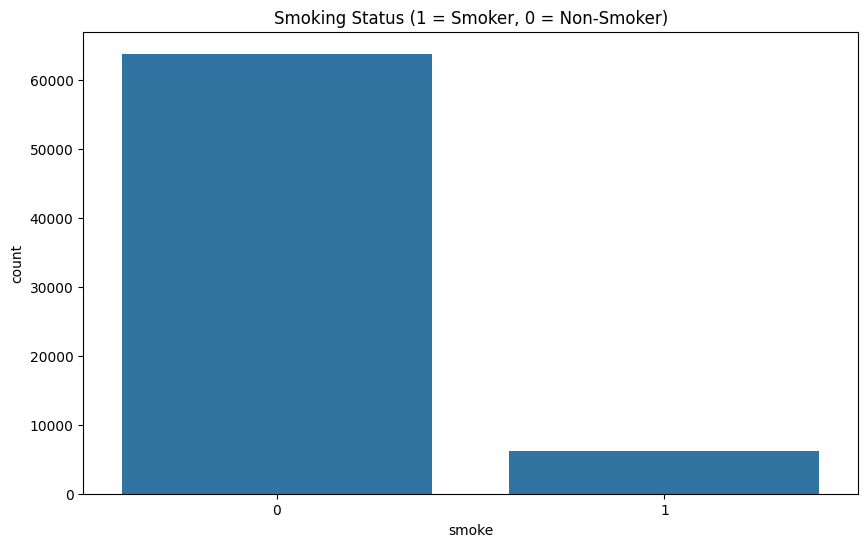

In [8]:
# 1.1 d) Andel rökare
# 1 = rökare, 0 = icke-rökare
print(cardio["smoke"].value_counts())
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x="smoke", data=cardio)
plt.title("Smoking Status (1 = Smoker, 0 = Non-Smoker)")
plt.show()

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64


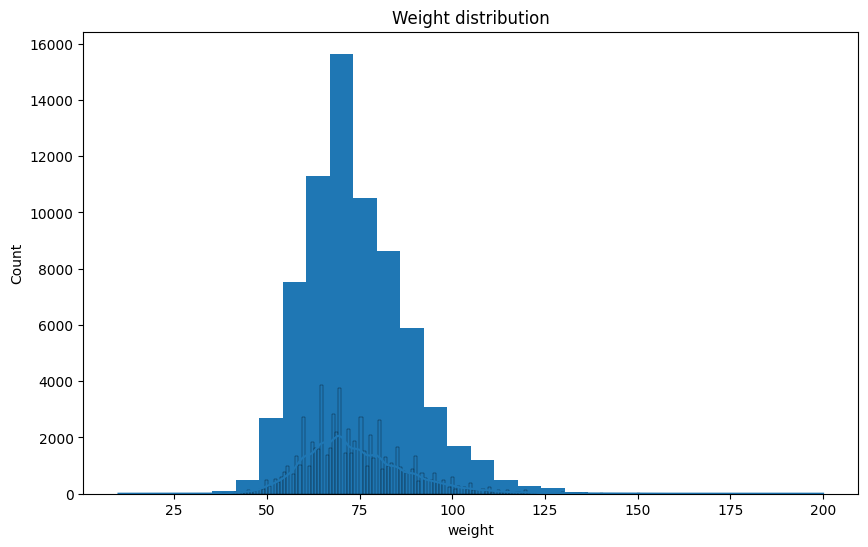

In [9]:
# 1.1 e) Viktfördelning
# Vikt i kg
print(cardio["weight"].describe())

# Viktfördelning plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(cardio["weight"], bins=30)
sns.histplot(cardio["weight"], kde=True)
plt.title("Weight distribution")
plt.show()

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64


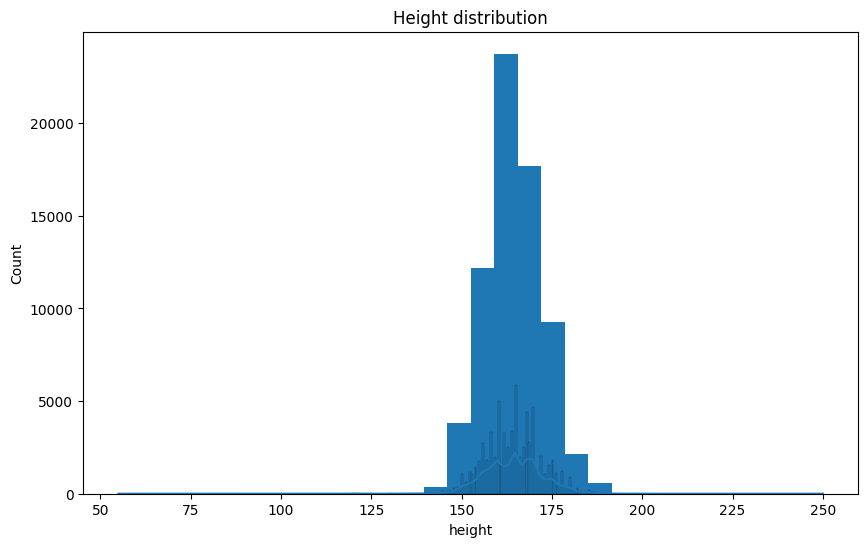

In [10]:
# 1.1 f) Längdfördelning
# Längd i cm
print(cardio["height"].describe())

# Längdfördelning plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(cardio["height"], bins=30)
sns.histplot(cardio["height"], kde=True)
plt.title("Height distribution")
plt.show()

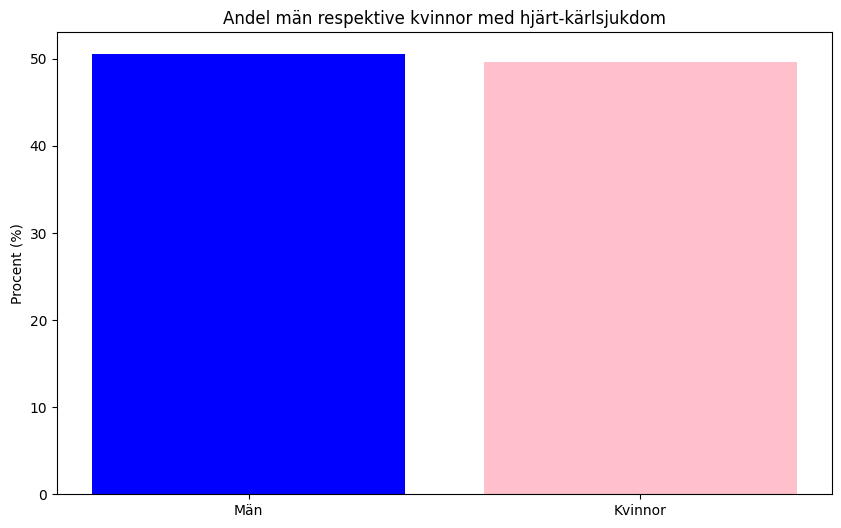

Andel män med hjärt-kärlsjukdom: 50.52%
Andel kvinnor med hjärt-kärlsjukdom: 49.67%


In [12]:
# 1.1 g) Andel kvinnor reserpektive män med hjärtkärlsjukdom
# Plot andel kvinnor respektive män med hjärtkärlsjukdom
fig, ax = plt.subplots(figsize=(10, 6))

# Skapa en DataFrame från det givna datasetet
df = pd.DataFrame(cardio)

# Beräkna antalet män och kvinnor med hjärt-kärlsjukdom
num_men_with_cardio = df[(df['gender'] == 2) & (df['cardio'] == 1)].shape[0]
num_women_with_cardio = df[(df['gender'] == 1) & (df['cardio'] == 1)].shape[0]

# Beräkna totalt antal män och kvinnor
total_men = df[df['gender'] == 2].shape[0]
total_women = df[df['gender'] == 1].shape[0]

# Beräkna andel män och kvinnor med hjärt-kärlsjukdom
men_percentage = (num_men_with_cardio / total_men) * 100
women_percentage = (num_women_with_cardio / total_women) * 100

# Plot resultaten    
labels = ['Män', 'Kvinnor']
percentages = [men_percentage, women_percentage]
ax.bar(labels, percentages, color=['blue', 'pink'])
plt.title("Andel män respektive kvinnor med hjärt-kärlsjukdom")
plt.ylabel("Procent (%)")
plt.show()

print(f"Andel män med hjärt-kärlsjukdom: {men_percentage:.2f}%")
print(f"Andel kvinnor med hjärt-kärlsjukdom: {women_percentage:.2f}%")

För att ta bort prover med orealistiska BMI och avvikare(outliers) kan man definera ett rimligt intervall för BMI-värden baserat på medicinska riktlinjer eller statistisk analys. Ett generellt tillvägagångssätt för att bestämma gränserna är:

* Medicinska riktlinjer: Världshälsoorganisationen (WHO) definierar följande riktlinjer:


* **BMI:**
- Undernärning: < 18.5
- Normalvikt: 18.5–24.9
- Pre-obesitet: 25.0-29.9
- Obisitet klass 1: 30.0-34.9
- Obisitet klass 2: 35.0-39.9
- Obisitet klass 3: > 40.0

För att säkerställa att dom insamlade proverna är representativa och användbara för analysen eliminerades data som ligger utanför riktlinjerna. Genom att göra detta förbättrades kvaliteten och tillförlitligheten hos den data som används i analys och slutsatser. Att följa dessa riktlinjer har hjälpt till att säkerställa att resultatet är vetenskapligt giltligt och användbart.


* https://sv.wikipedia.org/wiki/BMI_(kroppsmasseindex)
* https://www.who.int/europe/news-room/fact-sheets/item/a-healthy-lifestyle---who-recommendations
* https://www.who.int/data/gho/data/themes/topics/topic-details/GHO/body-mass-index
* https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html

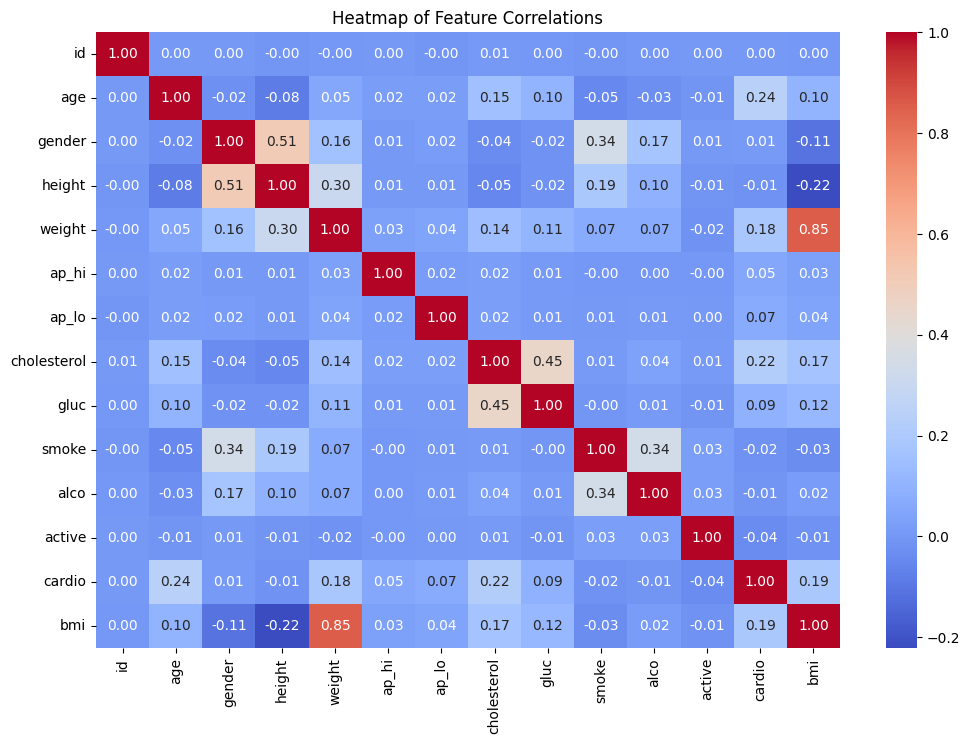

In [15]:
# 1.2 Heatmap av korrelationer

plt.figure(figsize=(12, 8))
sns.heatmap(cardio.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap of Feature Correlations")
plt.show()


In [17]:
# 1.2.1 Skapa en BMI-feature
# BMI = vikt / längd^2
cardio["bmi"] = cardio["weight"] / (cardio["height"] / 100) ** 2

# a) Släng samples med orimliga BMI-värden och outliers
# Släng samples med orimliga BMI-värden
cardio = cardio[(cardio["bmi"] > 10) & (cardio["bmi"] < 100)]


# 1.2.1 b) Skapa en kategorisk BMI-feature med kategorierna: normal range, overweight, obese (class I), obese (class II), obese (class III).
# BMI-kategorier
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float("inf")]
bmi_labels = ["Underweight", "Normal weight", "Overweight", "Obese (Class I)", "Obese (Class II)", "Obese (Class III)"]
cardio["bmi_category"] = pd.cut(cardio["bmi"], bins=bmi_bins, labels=bmi_labels)


C:\Users\user\AppData\Local\Temp\ipykernel_14200\3331753310.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(cardio[["bmi_category", "cardio"]].groupby("bmi_category").mean())


                     cardio
bmi_category               
Underweight        0.276398
Normal weight      0.398739
Overweight         0.508199
Obese (Class I)    0.601872
Obese (Class II)   0.678333
Obese (Class III)  0.694105


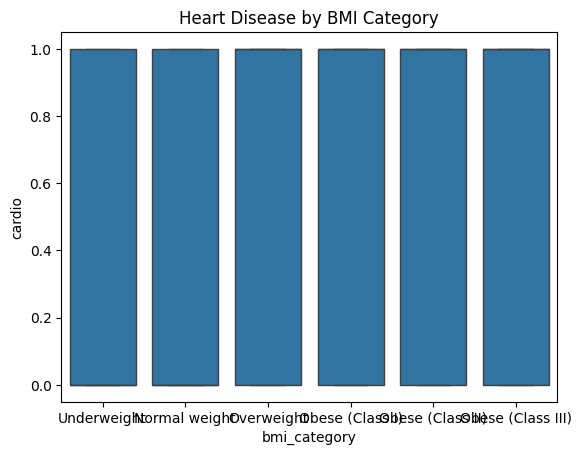

In [18]:
print(cardio[["bmi_category", "cardio"]].groupby("bmi_category").mean())
sns.boxplot(x="bmi_category", y="cardio", data=cardio)
plt.title("Heart Disease by BMI Category")
plt.show()


                  cardio
blood_pressure          
0               0.667450
1               0.159221
2               0.320997
3               0.743663
4               0.846282
5               0.846774
6               0.906250


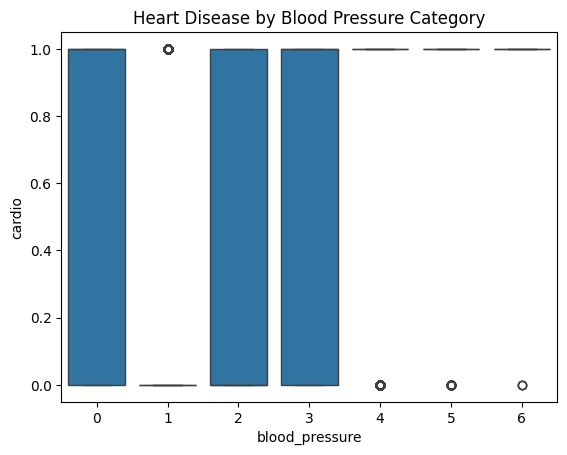

In [24]:
# Blodtryckskategorier
cardio["blood_pressure"] = 0
cardio.loc[(cardio["ap_lo"] <= 60) & (cardio["ap_hi"] <= 90), "blood_pressure"] = 1
cardio.loc[(cardio["ap_lo"] > 60) & (cardio["ap_lo"] <= 80) & (cardio["ap_hi"] > 90) & (cardio["ap_hi"] <= 120), "blood_pressure"] = 2
cardio.loc[(cardio["ap_lo"] > 80) & (cardio["ap_lo"] <= 90) & (cardio["ap_hi"] > 120) & (cardio["ap_hi"] <= 140), "blood_pressure"] = 3
cardio.loc[(cardio["ap_lo"] > 90) & (cardio["ap_lo"] <= 100) & (cardio["ap_hi"] > 140) & (cardio["ap_hi"] <= 160), "blood_pressure"] = 4
cardio.loc[(cardio["ap_lo"] > 100) & (cardio["ap_lo"] <= 120) & (cardio["ap_hi"] > 160) & (cardio["ap_hi"] <= 180), "blood_pressure"] = 5
cardio.loc[(cardio["ap_lo"] > 120) & (cardio["ap_lo"] <= 200) & (cardio["ap_hi"] > 180) & (cardio["ap_hi"] <= 250), "blood_pressure"] = 6

print(cardio[["blood_pressure", "cardio"]].groupby("blood_pressure").mean())
sns.boxplot(x="blood_pressure", y="cardio", data=cardio)
plt.title("Heart Disease by Blood Pressure Category")
plt.show()


In [23]:
# 1.2.1 c) 
# Skapa en DataFrame (ersätt med befintlig DataFrame)
cardio_bmi = pd.DataFrame({
    "bmi" : [19, 22, 27, 30, 33, 36, 39] # exempel på BMI-värden
})

# Definera gränserna för BMI-kategorierna
bmi_bins = [-float("inf"), 18.5, 24.9, 29.9, 34.9, 39.9, float("inf")]

cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category,blood_pressure
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,Normal weight,2
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,Obese (Class II),3
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,Normal weight,0
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,Overweight,4
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,Normal weight,0


In [20]:
print(cardio.columns)

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi',
       'bmi_category'],
      dtype='object')


In [16]:
# 1.2.1 Skapa en feature för blodtryckskategorier enligt tabellen i denna artikel.
# Blodtryckskategorier
cardio["blood_pressure"] = 0
cardio.loc[(cardio["ap_lo"] <= 60) & (cardio["ap_hi"] <= 90), "blood_pressure"] = 1

# a) Släng bort samples med orimliga blodtryck och outliers. Likt förra uppgiften är det inte trivialt att sätta gränserna. Beskriv hur du kommer fram till gränserna.
# Filtrera bort orimliga blodtrycksvärden
cardio = cardio[(cardio["ap_lo"] >= 60) & (cardio["ap_lo"] <= 200) & (cardio["ap_hi"] >= 90) & (cardio["ap_hi"] <= 250)]

# b) Skapa en kategorisk feature med relevanta kategorier.
# Blodtryckskategorier
cardio["blood_pressure"] = 0
cardio.loc[(cardio["ap_lo"] <= 60) & (cardio["ap_hi"] <= 90), "blood_pressure"] = 1
cardio.loc[(cardio["ap_lo"] > 60) & (cardio["ap_lo"] <= 80) & (cardio["ap_hi"] > 90) & (cardio["ap_hi"] <= 120), "blood_pressure"] = 2
cardio.loc[(cardio["ap_lo"] > 80) & (cardio["ap_lo"] <= 90) & (cardio["ap_hi"] > 120) & (cardio["ap_hi"] <= 140), "blood_pressure"] = 3
cardio.loc[(cardio["ap_lo"] > 90) & (cardio["ap_lo"] <= 100) & (cardio["ap_hi"] > 140) & (cardio["ap_hi"] <= 160), "blood_pressure"] = 4
cardio.loc[(cardio["ap_lo"] > 100) & (cardio["ap_lo"] <= 120) & (cardio["ap_hi"] > 160) & (cardio["ap_hi"] <= 180), "blood_pressure"] = 5
cardio.loc[(cardio["ap_lo"] > 120) & (cardio["ap_lo"] <= 200) & (cardio["ap_hi"] > 180) & (cardio["ap_hi"] <= 250), "blood_pressure"] = 6

#c) Undersök om den nya kategorin är relevant, dvs har den någon nyttig korrelation? Uppdatera data-analysen om du hittar något intressant.
# Skapa en kategorisk feature för blodtryckskategorier
cardio["blood_pressure"] = 0
cardio.loc[(cardio["ap_lo"] <= 60) & (cardio["ap_hi"] <= 90), "blood_pressure"] = 1
cardio.loc[(cardio["ap_lo"] > 60) & (cardio["ap_lo"] <= 80) & (cardio["ap_hi"] > 90) & (cardio["ap_hi"] <= 120), "blood_pressure"] = 2

# Printa korrelationen mellan den nya featuren och target-variabeln
print(cardio[["blood_pressure", "cardio"]].corr())

                blood_pressure    cardio
blood_pressure        1.000000 -0.377854
cardio               -0.377854  1.000000


In [25]:
cardio_copy2 = cardio.copy()
# Ta bort kolumnerna från DataFrame
columns_to_drop = ["blood_pressure", "height", "weight"]
cardio_copy2.drop(columns=columns_to_drop, inplace=True)

# Gör one-hot encoding på kön
cardio_copy2 = pd.get_dummies(cardio_copy2, columns=["gender"], drop_first=True)

print(cardio_copy2)

          id        age  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  \
0          0  50.391781    110     80            1     1      0     0       1   
1          1  55.419178    140     90            3     1      0     0       1   
2          2  51.663014    130     70            3     1      0     0       0   
3          3  48.282192    150    100            1     1      0     0       1   
4          4  47.873973    100     60            1     1      0     0       0   
...      ...        ...    ...    ...          ...   ...    ...   ...     ...   
69995  99993  52.712329    120     80            1     1      1     0       1   
69996  99995  61.920548    140     90            2     2      0     0       1   
69997  99996  52.235616    180     90            3     1      0     1       0   
69998  99998  61.454795    135     80            1     2      0     0       0   
69999  99999  56.273973    120     80            2     1      0     0       1   

       cardio        bmi   

In [27]:
# 1.2.2 Skapa två dataset

# 1. Dataset med kategorisk data tillagd
cardio_cat = cardio.copy()
cardio_cat = pd.get_dummies(cardio_cat, columns=["bmi_category", "blood_pressure", "gender"], drop_first=True)
cardio_cat.drop(columns=["height", "weight", "bmi"], inplace=True)

# 2. Dataset med endast BMI tillagd
cardio_bmi = cardio.copy()
cardio_bmi.drop(columns=["bmi_category", "blood_pressure", "height", "weight"], inplace=True)
cardio_bmi = pd.get_dummies(cardio_bmi, columns=["gender"], drop_first=True)


In [32]:
# 1.2.3 Utförande
# 1 Val av algoritmer och hyperparameteroptimering

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Förbered data
X = cardio.drop(columns=["cardio"], axis=1)
y = cardio["cardio"]

# Dela upp datan i tränings- och testdata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Omvandla kategoriska kolumner till numeriska
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Se till att tränings- och testdata har samma kolumner
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Funktion för att skapa en pipeline
def create_pipeline(model):
    return Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])

# Funktion för att träna och utvärdera modeller
def evaluate_model(model, param_grid, X_train, y_train):
    # Skapa en pipeline
    pipeline = create_pipeline(model)

    # Skapa en grid search
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)

    # Träna modellen
    grid_search.fit(X_train, y_train)

    return grid_search

# SVM
svm_param_grid = {
    "model__C": [0.1, 1, 10],
    "model__kernel": ["linear", "rbf"],
    "model__gamma": ["scale", "auto"]
}
grid_svm = evaluate_model(SVC(), svm_param_grid, X_train, y_train)
print("Best parameters for grid:", grid_svm.best_params_)
print("Best accuracy for grid:", grid_svm.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for grid: {'model__C': 1, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Best accuracy for grid: 0.7216130678917815


In [33]:
# 1.2.3
# Random Forest

param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20]
}

grid_rf = evaluate_model(RandomForestClassifier(), param_grid_rf, X_train, y_train)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best accuracy for Random Forest:", grid_rf.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for Random Forest: {'model__max_depth': 10, 'model__n_estimators': 300}
Best accuracy for Random Forest: 0.7341704951505871


In [34]:
# 1.2.3 
# KNN

param_grid_knn = {
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance'],
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_knn = evaluate_model(KNeighborsClassifier(), param_grid_knn, X_train, y_train)
print("Best parameters for KNN:", grid_knn.best_params_)
print("Best accuracy for KNN:", grid_knn.best_score_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters for KNN: {'model__algorithm': 'auto', 'model__n_neighbors': 9, 'model__weights': 'uniform'}
Best accuracy for KNN: 0.6783665135273098


In [35]:
# 1.2.3 Utvärdera 

from sklearn.metrics import classification_report, accuracy_score

# Funktion för att utvärdera en modell
def evaluate_test_data(grid_search, X_test, y_test):
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Classification report:\n", classification_report(y_test, y_pred))

# Utvärdera modellerna på testdata
print("SVM: ")
evaluate_test_data(grid_svm, X_test, y_test)

print("Random Forest: ")
evaluate_test_data(grid_rf, X_test, y_test)

print("KNN: ")
evaluate_test_data(grid_knn, X_test, y_test)

SVM: 
Accuracy:  0.7230109575988566
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.73      0.72     10415
           1       0.73      0.71      0.72     10575

    accuracy                           0.72     20990
   macro avg       0.72      0.72      0.72     20990
weighted avg       0.72      0.72      0.72     20990

Random Forest: 
Accuracy:  0.7323963792282039
Classification report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.74     10415
           1       0.76      0.68      0.72     10575

    accuracy                           0.73     20990
   macro avg       0.74      0.73      0.73     20990
weighted avg       0.74      0.73      0.73     20990

KNN: 
Accuracy:  0.6818484992853739
Classification report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68     10415
           1       0.68      0.68      0.68    

In [36]:
# 1.2.3 Samla data om utfallet

results = {
    "SVM": {
        "Best parameters": grid_svm.best_params_,
        "Best accuracy": grid_svm.best_score_,
        "Test accuracy": accuracy_score(y_test, grid_svm.best_estimator_.predict(X_test))
    },
    "Random Forest": {
        "Best parameters": grid_rf.best_params_,
        "Best accuracy": grid_rf.best_score_,
        "Test accuracy": accuracy_score(y_test, grid_rf.best_estimator_.predict(X_test))
    },
    "KNN": {
        "Best parameters": grid_knn.best_params_,
        "Best accuracy": grid_knn.best_score_,
        "Test accuracy": accuracy_score(y_test, grid_knn.best_estimator_.predict(X_test))
    }
}

# Skriv ut alla resultat
for model, result in results.items():
    print(f"\n{model}:\n")
    for key, value in result.items():
        print(f"{key}: {value}")
    print(f"{key}: {value}")


SVM:

Best parameters: {'model__C': 1, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Best accuracy: 0.7216130678917815
Test accuracy: 0.7230109575988566
Test accuracy: 0.7230109575988566

Random Forest:

Best parameters: {'model__max_depth': 10, 'model__n_estimators': 300}
Best accuracy: 0.7341704951505871
Test accuracy: 0.7323963792282039
Test accuracy: 0.7323963792282039

KNN:

Best parameters: {'model__algorithm': 'auto', 'model__n_neighbors': 9, 'model__weights': 'uniform'}
Best accuracy: 0.6783665135273098
Test accuracy: 0.6818484992853739
Test accuracy: 0.6818484992853739


In [38]:
# 1.2.3 Plot av resultat
import matplotlib.pyplot as plt

models = ["SVM", "Random Forest", "KNN"]
training_accuracies = [results[model]["Best Training Accuracy"] for model in models]
test_accuracies = [results[model]["Test accuracy"] for model in models]

plt.figure(figsize=(10, 6))
plt.bar(models, training_accuracies, color="skyblue", label="Training accuracy")
plt.bar(models, test_accuracies, color="salmon", label="Test accuracy")

plt.xlabel("Accuracy")
plt.title("Training and Test Accuracy for Different Models")
plt.legend()
plt.show()

KeyError: 'Best Training Accuracy'